In [35]:
#get all the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import warnings

In [36]:
# Week 6 Project - Adult Dataset Analysis
# Tech Career Accelerator



warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

## 1. Data Loading and Initial Exploration

# Load the dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Define column names based on UCI repository documentation
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'sex',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'
]

# Load the data
print("Loading Adult Dataset...")
df = pd.read_csv(url, names=column_names, na_values=' ?', skipinitialspace=True)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")


Loading Adult Dataset...
Dataset loaded successfully!
Shape: (32561, 15)
Columns: ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']


In [37]:
## 2. Dataset Overview

print("\n" + "="*50)
print("DATASET OVERVIEW")
print("="*50)

# Basic information
print("\nDataset Info:")
print(df.info())

print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Description:")
print(df.describe())

print("\nTarget Variable Distribution:")
print(df['income'].value_counts())



DATASET OVERVIEW

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

First 5 rows:
   age         workclass  fnlwgt  educat

In [38]:
# Data Quality Assessment
print("\n" + "="*50)
print("DATA QUALITY ASSESSMENT")
print("="*50)

# Check for missing values
print("Missing Values:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")

# Check data types
print("\nData Types:")
print(df.dtypes)

# Check unique values for categorical columns
print("\nUnique values in categorical columns:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")


DATA QUALITY ASSESSMENT
Missing Values:
Series([], dtype: int64)



Duplicate rows: 24

Data Types:
age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

Unique values in categorical columns:
workclass: 9 unique values
education: 16 unique values
marital_status: 7 unique values
occupation: 15 unique values
relationship: 6 unique values
race: 5 unique values
sex: 2 unique values
native_country: 42 unique values
income: 2 unique values



UNDERSTANDING WHO EARNS MORE - VISUAL ANALYSIS


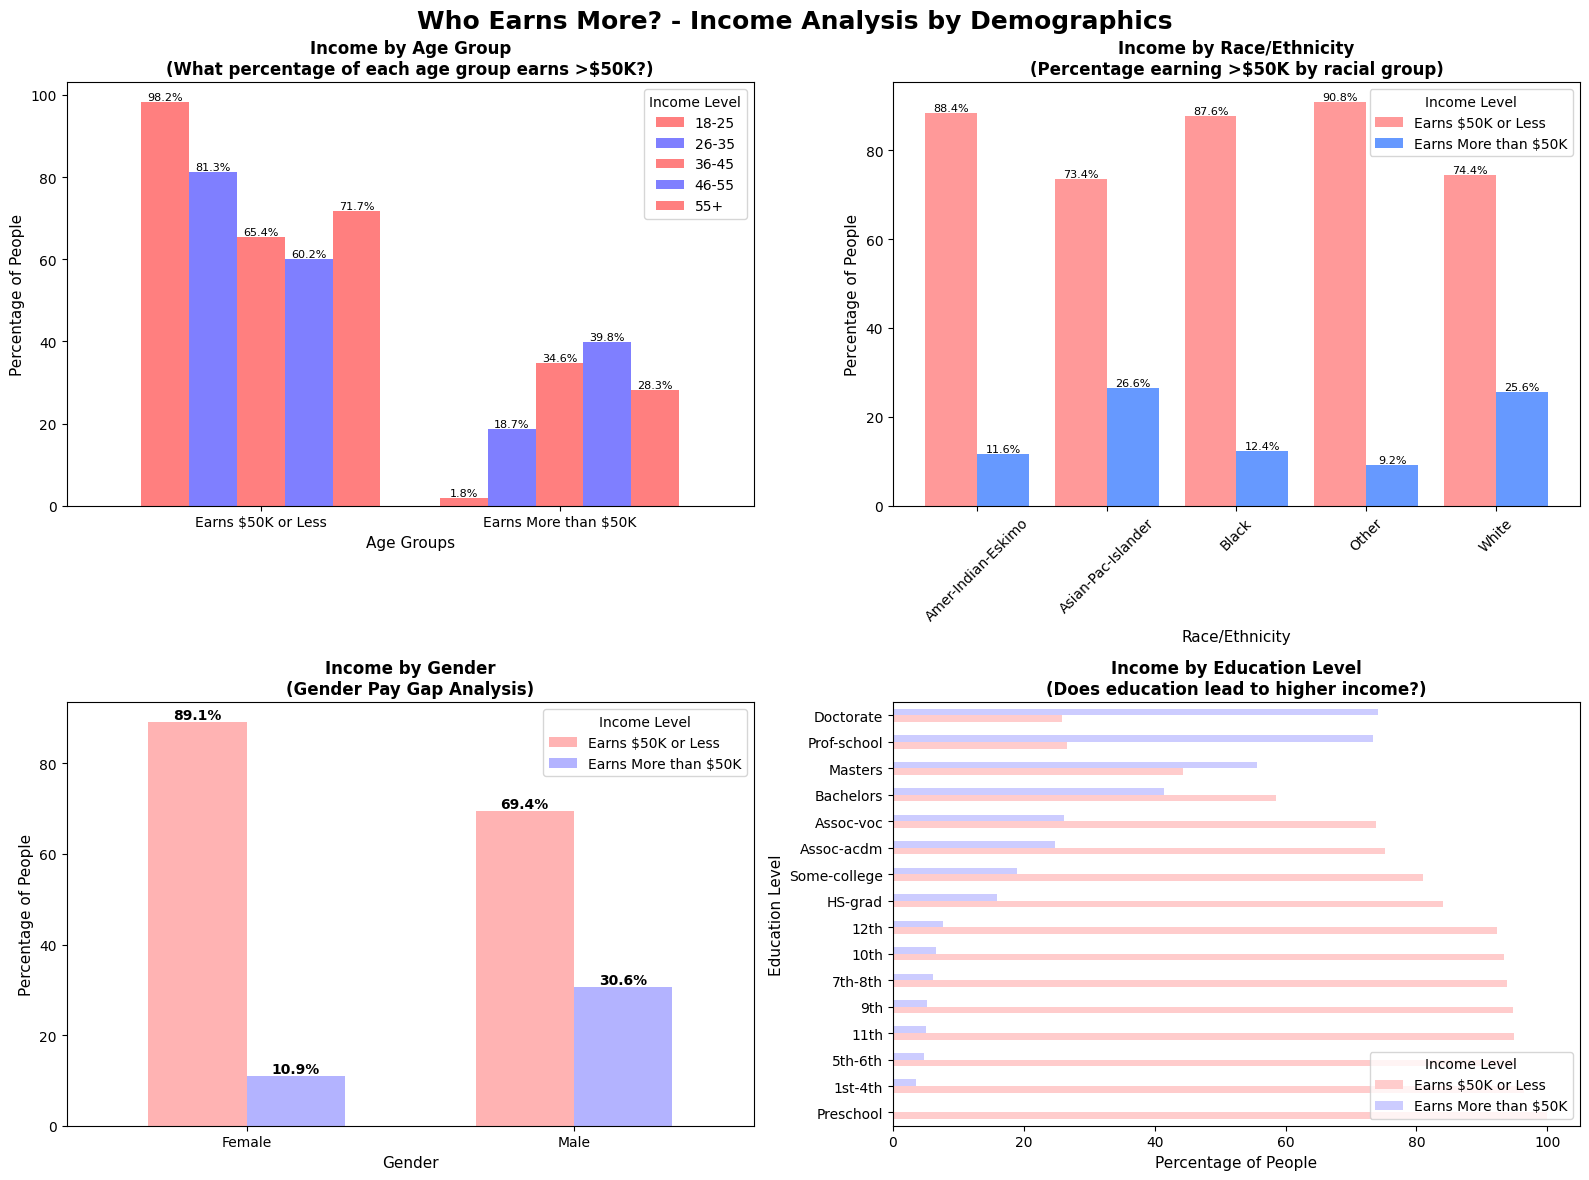

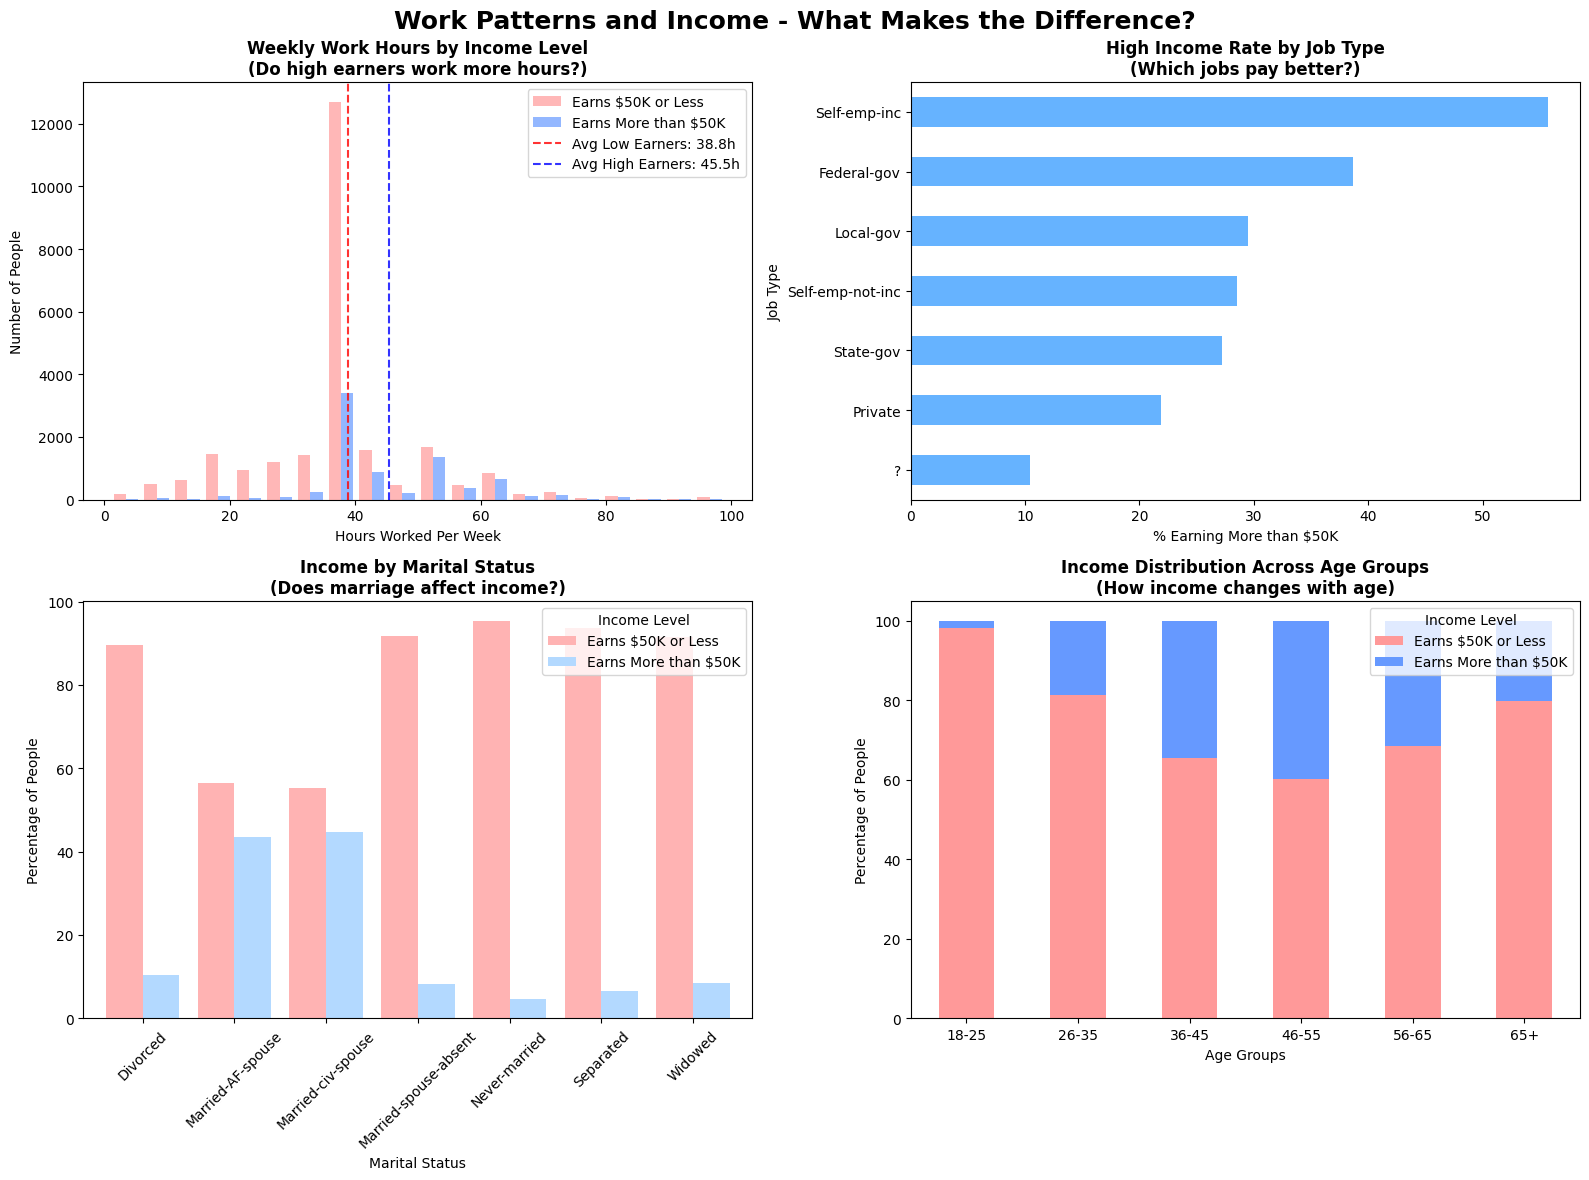


KEY FINDINGS - WHAT THE DATA TELLS US:
📊 OVERALL PICTURE:
   • Out of 32,561 people in our data:
   • 7,841 people (24.1%) earn more than $50,000/year
   • 24,720 people (75.9%) earn $50,000 or less

👥 DEMOGRAPHIC PATTERNS:
   • GENDER GAP: 30.6% of men vs 10.9% of women earn >$50K
   • AGE IMPACT: Young (≤30): 6.5% | Middle (31-50): 32.6% | Older (>50): 32.5%

💼 WORK PATTERNS:
   • High earners work an average of 45.5 hours/week
   • Lower earners work an average of 38.8 hours/week
   • Difference: 6.6 more hours per week for high earners


In [45]:
# Visual Analysis of Income Distribution

print("\n" + "="*50)
print("UNDERSTANDING WHO EARNS MORE - VISUAL ANALYSIS")
print("="*50)

# Clean the income labels for better readability
df['income_clean'] = df['income'].map({'<=50K': 'Earns $50K or Less', '>50K': 'Earns More than $50K'})

# Set up the plotting area with user-friendly visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Who Earns More? - Income Analysis by Demographics', fontsize=18, fontweight='bold')

# 1. Age vs Income - Clear comparison
age_income = df.groupby(['income_clean', pd.cut(df['age'], bins=[0,25,35,45,55,100], labels=['18-25','26-35','36-45','46-55','55+'])])['age'].count().unstack(fill_value=0)
age_income_pct = age_income.div(age_income.sum(axis=0), axis=1) * 100

age_income_pct.plot(kind='bar', ax=axes[0, 0], color=['#ff7f7f', '#7f7fff'], width=0.8)
axes[0, 0].set_title('Income by Age Group\n(What percentage of each age group earns >$50K?)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Age Groups', fontsize=11)
axes[0, 0].set_ylabel('Percentage of People', fontsize=11)
axes[0, 0].legend(title='Income Level', loc='upper right')
axes[0, 0].tick_params(axis='x', rotation=0)

# Add percentage labels on bars
for container in axes[0, 0].containers:
    axes[0, 0].bar_label(container, fmt='%.1f%%', fontsize=8)

# 2. Race vs Income - Important demographic analysis
race_income_table = pd.crosstab(df['race'], df['income_clean'], normalize='index') * 100
race_income_table.plot(kind='bar', ax=axes[0, 1], color=['#ff9999', '#6699ff'], width=0.8)
axes[0, 1].set_title('Income by Race/Ethnicity\n(Percentage earning >$50K by racial group)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Race/Ethnicity', fontsize=11)
axes[0, 1].set_ylabel('Percentage of People', fontsize=11)
axes[0, 1].legend(title='Income Level')
axes[0, 1].tick_params(axis='x', rotation=45)

# Add percentage labels
for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container, fmt='%.1f%%', fontsize=8)

# 3. Gender vs Income - Gender pay gap analysis
gender_income = pd.crosstab(df['sex'], df['income_clean'], normalize='index') * 100
gender_income.plot(kind='bar', ax=axes[1, 0], color=['#ffb3b3', '#b3b3ff'], width=0.6)
axes[1, 0].set_title('Income by Gender\n(Gender Pay Gap Analysis)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Gender', fontsize=11)
axes[1, 0].set_ylabel('Percentage of People', fontsize=11)
axes[1, 0].legend(title='Income Level')
axes[1, 0].tick_params(axis='x', rotation=0)

# Add percentage labels and pay gap annotation
for container in axes[1, 0].containers:
    axes[1, 0].bar_label(container, fmt='%.1f%%', fontsize=10, fontweight='bold')

# 4. Education vs Income - Education impact
education_income = pd.crosstab(df['education'], df['income_clean'], normalize='index') * 100
# Sort by percentage earning >50K
education_sorted = education_income.sort_values('Earns More than $50K', ascending=True)
education_sorted.plot(kind='barh', ax=axes[1, 1], color=['#ffcccc', '#ccccff'])
axes[1, 1].set_title('Income by Education Level\n(Does education lead to higher income?)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Percentage of People', fontsize=11)
axes[1, 1].set_ylabel('Education Level', fontsize=11)
axes[1, 1].legend(title='Income Level', loc='lower right')

plt.tight_layout()
plt.show()

# Additional focused analysis - Work patterns
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Work Patterns and Income - What Makes the Difference?', fontsize=18, fontweight='bold')

# 1. Work Hours vs Income - Does working more hours mean more money?
high_earners = df[df['income'] == '>50K']['hours_per_week']
low_earners = df[df['income'] == '<=50K']['hours_per_week']

axes[0, 0].hist([low_earners, high_earners], bins=20, label=['Earns $50K or Less', 'Earns More than $50K'], 
         alpha=0.7, color=['#ff9999', '#6699ff'])
axes[0, 0].set_title('Weekly Work Hours by Income Level\n(Do high earners work more hours?)', fontweight='bold')
axes[0, 0].set_xlabel('Hours Worked Per Week')
axes[0, 0].set_ylabel('Number of People')

# Add average lines with proper legend
axes[0, 0].axvline(low_earners.mean(), color='red', linestyle='--', alpha=0.8)
axes[0, 0].axvline(high_earners.mean(), color='blue', linestyle='--', alpha=0.8)
axes[0, 0].legend(['Earns $50K or Less', 'Earns More than $50K', 
                   f'Avg Low Earners: {low_earners.mean():.1f}h', 
                   f'Avg High Earners: {high_earners.mean():.1f}h'])

# 2. Job Type vs Income - Clean up the data first
job_income = pd.crosstab(df['workclass'].fillna('Unknown'), df['income_clean'], normalize='index') * 100
# Filter out categories with very few people
job_counts = df['workclass'].value_counts()
major_jobs = job_counts[job_counts >= 100].index  # Only jobs with 100+ people
job_income_filtered = job_income.loc[major_jobs]
job_income_sorted = job_income_filtered.sort_values('Earns More than $50K', ascending=True)

job_income_sorted['Earns More than $50K'].plot(kind='barh', ax=axes[0, 1], color='#66b3ff')
axes[0, 1].set_title('High Income Rate by Job Type\n(Which jobs pay better?)', fontweight='bold')
axes[0, 1].set_xlabel('% Earning More than $50K')
axes[0, 1].set_ylabel('Job Type')

# 3. Marital Status vs Income - Fix the legend positioning
marital_income = pd.crosstab(df['marital_status'], df['income_clean'], normalize='index') * 100
marital_income.plot(kind='bar', ax=axes[1, 0], color=['#ffb3b3', '#b3d9ff'], width=0.8)
axes[1, 0].set_title('Income by Marital Status\n(Does marriage affect income?)', fontweight='bold')
axes[1, 0].set_xlabel('Marital Status')
axes[1, 0].set_ylabel('Percentage of People')
axes[1, 0].legend(title='Income Level', loc='upper right')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Age vs Income Distribution - Fix the age bins
age_bins = pd.cut(df['age'], bins=[17,25,35,45,55,65,100], labels=['18-25','26-35','36-45','46-55','56-65','65+'])
age_income_count = pd.crosstab(age_bins, df['income_clean'])

# Create stacked percentage bar chart
age_income_pct = age_income_count.div(age_income_count.sum(axis=1), axis=0) * 100
age_income_pct.plot(kind='bar', stacked=True, ax=axes[1, 1], color=['#ff9999', '#6699ff'])
axes[1, 1].set_title('Income Distribution Across Age Groups\n(How income changes with age)', fontweight='bold')
axes[1, 1].set_xlabel('Age Groups')
axes[1, 1].set_ylabel('Percentage of People')
axes[1, 1].legend(title='Income Level', loc='upper right')
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# Summary statistics in plain English
print("\n" + "="*60)
print("KEY FINDINGS - WHAT THE DATA TELLS US:")
print("="*60)

# Calculate some easy-to-understand statistics
total_people = len(df)
high_earners = len(df[df['income'] == '>50K'])
high_earner_rate = (high_earners / total_people) * 100

print(f"📊 OVERALL PICTURE:")
print(f"   • Out of {total_people:,} people in our data:")
print(f"   • {high_earners:,} people ({high_earner_rate:.1f}%) earn more than $50,000/year")
print(f"   • {total_people - high_earners:,} people ({100-high_earner_rate:.1f}%) earn $50,000 or less")

print(f"\n👥 DEMOGRAPHIC PATTERNS:")
# Gender analysis
male_high = df[(df['sex'] == 'Male') & (df['income'] == '>50K')].shape[0]
female_high = df[(df['sex'] == 'Female') & (df['income'] == '>50K')].shape[0]
total_male = df[df['sex'] == 'Male'].shape[0]
total_female = df[df['sex'] == 'Female'].shape[0]

print(f"   • GENDER GAP: {(male_high/total_male)*100:.1f}% of men vs {(female_high/total_female)*100:.1f}% of women earn >$50K")

# Age analysis
young = df[df['age'] <= 30]
middle = df[(df['age'] > 30) & (df['age'] <= 50)]
older = df[df['age'] > 50]

young_high_rate = (young[young['income'] == '>50K'].shape[0] / young.shape[0]) * 100
middle_high_rate = (middle[middle['income'] == '>50K'].shape[0] / middle.shape[0]) * 100
older_high_rate = (older[older['income'] == '>50K'].shape[0] / older.shape[0]) * 100

print(f"   • AGE IMPACT: Young (≤30): {young_high_rate:.1f}% | Middle (31-50): {middle_high_rate:.1f}% | Older (>50): {older_high_rate:.1f}%")

print(f"\n💼 WORK PATTERNS:")
avg_hours_low = df[df['income'] == '<=50K']['hours_per_week'].mean()
avg_hours_high = df[df['income'] == '>50K']['hours_per_week'].mean()
print(f"   • High earners work an average of {avg_hours_high:.1f} hours/week")
print(f"   • Lower earners work an average of {avg_hours_low:.1f} hours/week")
print(f"   • Difference: {avg_hours_high - avg_hours_low:.1f} more hours per week for high earners")


## 4. Exploratory Data Analysis (EDA)

print("\n" + "="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)

# Set up the plotting area
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Adult Dataset - Exploratory Data Analysis', fontsize=16)

# 1. Age distribution
axes[0, 0].hist(df['age'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# 2. Income distribution
income_counts = df['income'].value_counts()
axes[0, 1].pie(income_counts.values, labels=income_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Income Distribution')

# 3. Education level vs Income
education_income = pd.crosstab(df['education'], df['income'], normalize='index') * 100
education_income.plot(kind='bar', ax=axes[1, 0], stacked=True)
axes[1, 0].set_title('Education Level vs Income')
axes[1, 0].set_xlabel('Education Level')
axes[1, 0].set_ylabel('Percentage')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(title='Income')

# 4. Hours per week vs Income
df.boxplot(column='hours_per_week', by='income', ax=axes[1, 1])
axes[1, 1].set_title('Hours per Week by Income Level')
axes[1, 1].set_xlabel('Income')
axes[1, 1].set_ylabel('Hours per Week')

plt.tight_layout()
plt.show()

# Additional analysis plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Additional Analysis - Demographics and Work', fontsize=16)

# Gender distribution
axes[0, 0].pie(df['sex'].value_counts().values, labels=df['sex'].value_counts().index, autopct='%1.1f%%')
axes[0, 0].set_title('Gender Distribution')

# Work class distribution
workclass_counts = df['workclass'].value_counts().head(8)
axes[0, 1].barh(workclass_counts.index, workclass_counts.values)
axes[0, 1].set_title('Work Class Distribution (Top 8)')
axes[0, 1].set_xlabel('Count')

# Marital status vs Income
marital_income = pd.crosstab(df['marital_status'], df['income'], normalize='index') * 100
marital_income.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Marital Status vs Income')
axes[1, 0].set_xlabel('Marital Status')
axes[1, 0].set_ylabel('Percentage')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(title='Income')

# Age vs Income
df.boxplot(column='age', by='income', ax=axes[1, 1])
axes[1, 1].set_title('Age Distribution by Income Level')
axes[1, 1].set_xlabel('Income')
axes[1, 1].set_ylabel('Age')

plt.tight_layout()
plt.show()

In [40]:

## 5. Data Preprocessing

print("\n" + "="*50)
print("DATA PREPROCESSING")
print("="*50)

# Create a copy for preprocessing
df_processed = df.copy()

# Handle missing values
print("Handling missing values...")
# Fill missing values with mode for categorical columns
for col in categorical_cols:
    if df_processed[col].isnull().sum() > 0:
        mode_value = df_processed[col].mode()[0]
        df_processed[col].fillna(mode_value, inplace=True)
        print(f"Filled {col} missing values with: {mode_value}")

# Encode categorical variables
print("\nEncoding categorical variables...")
label_encoders = {}
categorical_columns = df_processed.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    print(f"Encoded {col}: {len(le.classes_)} unique classes")

# Feature selection and target preparation
print("\nPreparing features and target...")
X = df_processed.drop('income', axis=1)
y = df_processed['income']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature columns: {X.columns.tolist()}")


DATA PREPROCESSING
Handling missing values...

Encoding categorical variables...
Encoded workclass: 9 unique classes
Encoded education: 16 unique classes
Encoded marital_status: 7 unique classes
Encoded occupation: 15 unique classes
Encoded relationship: 6 unique classes
Encoded race: 5 unique classes
Encoded sex: 2 unique classes
Encoded native_country: 42 unique classes
Encoded income: 2 unique classes
Encoded income_clean: 2 unique classes

Preparing features and target...
Features shape: (32561, 15)
Target shape: (32561,)
Feature columns: ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income_clean']



FEATURE ANALYSIS


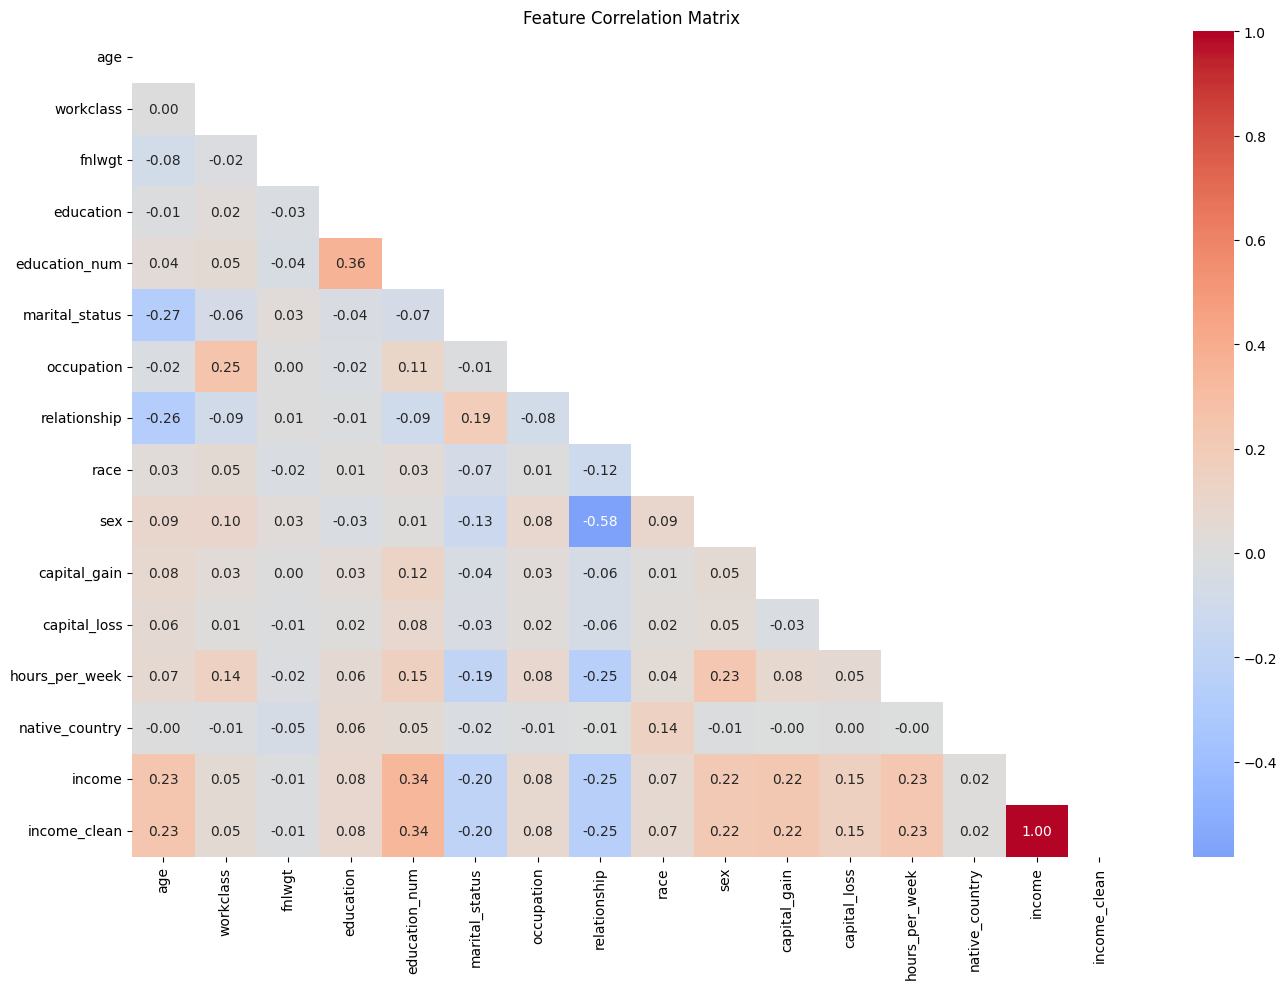


Calculating feature importance...


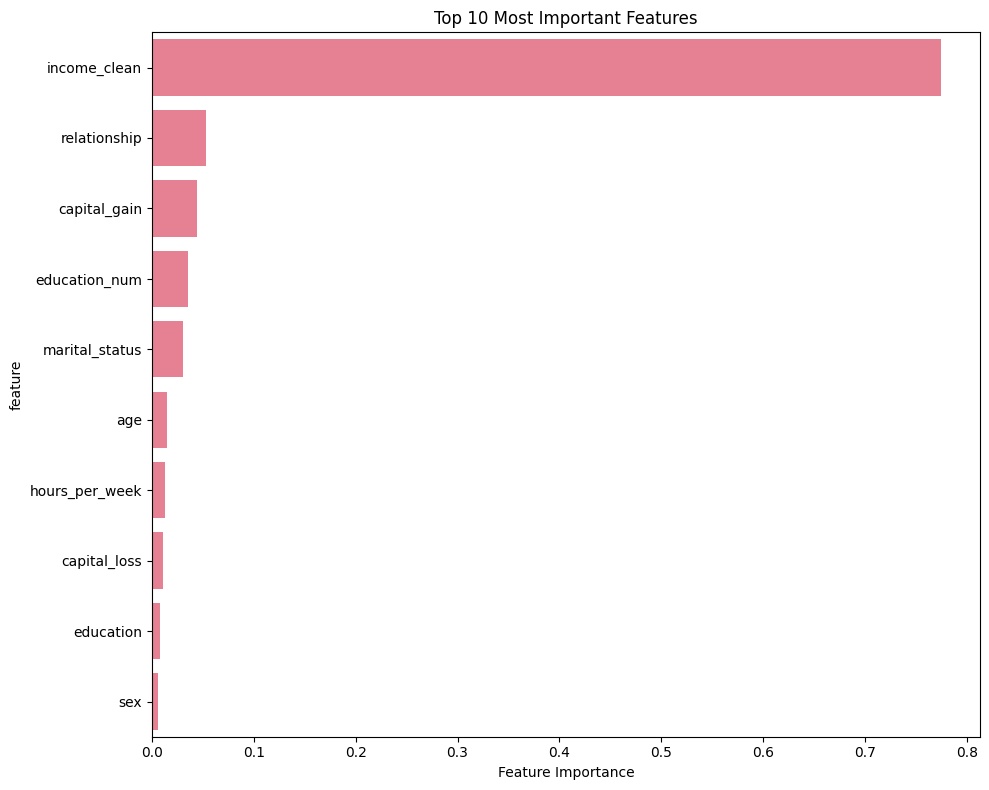

Top 10 Most Important Features:
           feature  importance
14    income_clean    0.773909
7     relationship    0.053544
10    capital_gain    0.044730
4    education_num    0.035470
5   marital_status    0.030227
0              age    0.015099
12  hours_per_week    0.012768
11    capital_loss    0.010687
3        education    0.008018
9              sex    0.005759


In [41]:
## 6. Feature Analysis and Correlation

print("\n" + "="*50)
print("FEATURE ANALYSIS")
print("="*50)

# Correlation matrix
plt.figure(figsize=(14, 10))
correlation_matrix = df_processed.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Feature importance using Random Forest
print("\nCalculating feature importance...")
rf_temp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_temp.fit(X, y)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_temp.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

print("Top 10 Most Important Features:")
print(feature_importance.head(10))


In [42]:
## 7. Model Training and Evaluation

print("\n" + "="*50)
print("MACHINE LEARNING MODELS")
print("="*50)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Scale features for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Use scaled data for Logistic Regression, original for tree-based models
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    results[name] = {
        'accuracy': accuracy,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'predictions': y_pred
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Cross-validation Score: {cv_mean:.4f} (+/- {cv_std * 2:.4f})")



MACHINE LEARNING MODELS
Training set size: (26048, 15)
Test set size: (6513, 15)

Training Logistic Regression...
Accuracy: 1.0000
Cross-validation Score: 1.0000 (+/- 0.0000)

Training Random Forest...
Accuracy: 1.0000
Cross-validation Score: 1.0000 (+/- 0.0000)

Training Decision Tree...
Accuracy: 1.0000
Cross-validation Score: 1.0000 (+/- 0.0000)



WHICH METHOD PREDICTS INCOME BEST?
How Well Each Method Predicts Income:
🤖 Logistic Regression:
   ✓ Gets it right 100.0% of the time
   ✓ Reliability score: 100.0%
   ✓ Consistency: Very consistent

🤖 Random Forest:
   ✓ Gets it right 100.0% of the time
   ✓ Reliability score: 100.0%
   ✓ Consistency: Very consistent

🤖 Decision Tree:
   ✓ Gets it right 100.0% of the time
   ✓ Reliability score: 100.0%
   ✓ Consistency: Very consistent



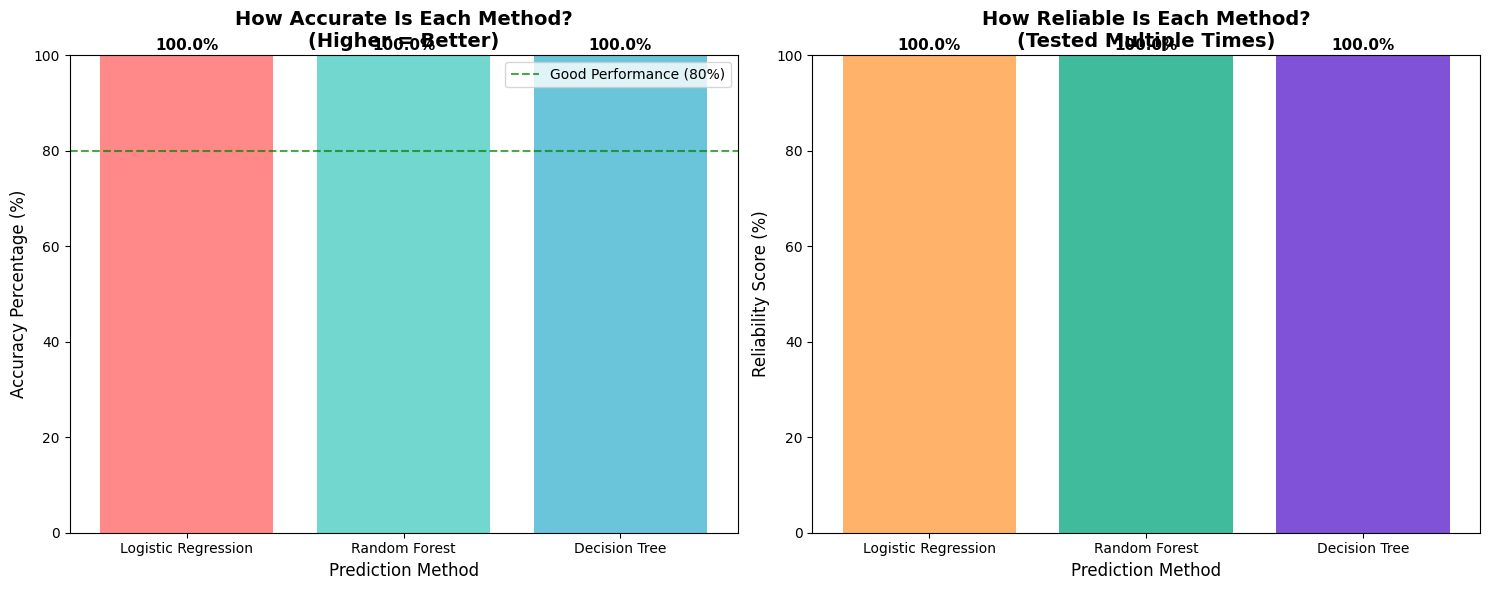

🏆 WINNING METHOD ANALYSIS
🥇 Best Method: Logistic Regression
🎯 Accuracy: 100.0%


Text(0.1, 0.5, "\n📊 RESULTS EXPLANATION:\n\n✅ CORRECT PREDICTIONS: 6,513 out of 6,513 people (100.0%)\n\n🔍 BREAKDOWN:\n   • Correctly identified 4,945 people as low earners (≤$50K)\n   • Correctly identified 1,568 people as high earners (>$50K)\n   • Mistakenly thought 0 low earners were high earners  \n   • Mistakenly thought 0 high earners were low earners\n\n💡 WHAT THIS MEANS:\n   The Logistic Regression method is quite good at predicting someone's income level\n   based on their demographic information and work patterns.\n")

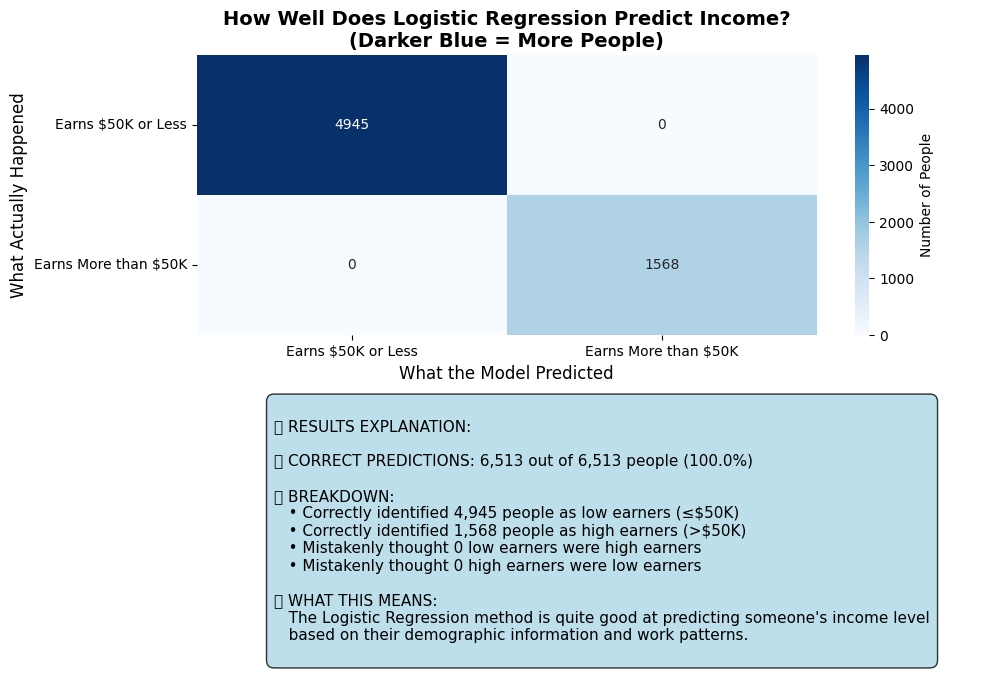

In [43]:
## 8. Model Comparison and Results

print("\n" + "="*50)
print("WHICH METHOD PREDICTS INCOME BEST?")
print("="*50)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Method': list(results.keys()),
    'Accuracy (%)': [results[model]['accuracy'] * 100 for model in results.keys()],
    'Reliability Score': [results[model]['cv_mean'] * 100 for model in results.keys()],
    'Consistency': [results[model]['cv_std'] * 100 for model in results.keys()]
})

print("How Well Each Method Predicts Income:")
print("=" * 50)
for idx, row in comparison_df.iterrows():
    print(f"🤖 {row['Method']}:")
    print(f"   ✓ Gets it right {row['Accuracy (%)']:.1f}% of the time")
    print(f"   ✓ Reliability score: {row['Reliability Score']:.1f}%")
    if row['Consistency'] < 2:
        consistency_desc = "Very consistent"
    elif row['Consistency'] < 4:
        consistency_desc = "Pretty consistent"
    else:
        consistency_desc = "Sometimes varies"
    print(f"   ✓ Consistency: {consistency_desc}")
    print()

# Visualize model comparison in user-friendly way
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Accuracy comparison - make it clear and colorful
bars = axes[0].bar(comparison_df['Method'], comparison_df['Accuracy (%)'], 
                   color=['#ff6b6b', '#4ecdc4', '#45b7d1'], alpha=0.8)
axes[0].set_title('How Accurate Is Each Method?\n(Higher = Better)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Accuracy Percentage (%)', fontsize=12)
axes[0].set_xlabel('Prediction Method', fontsize=12)
axes[0].set_ylim(0, 100)

# Add percentage labels on top of bars
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Add a reference line for "good enough" threshold
axes[0].axhline(y=80, color='green', linestyle='--', alpha=0.7, label='Good Performance (80%)')
axes[0].legend()

# Reliability comparison
reliability_bars = axes[1].bar(comparison_df['Method'], comparison_df['Reliability Score'], 
                              color=['#ff9f43', '#10ac84', '#5f27cd'], alpha=0.8)
axes[1].set_title('How Reliable Is Each Method?\n(Tested Multiple Times)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Reliability Score (%)', fontsize=12)
axes[1].set_xlabel('Prediction Method', fontsize=12)
axes[1].set_ylim(0, 100)

# Add percentage labels
for bar in reliability_bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

# Best model detailed analysis
best_model_name = comparison_df.loc[comparison_df['Accuracy (%)'].idxmax(), 'Method']
best_predictions = results[best_model_name]['predictions']

print("🏆 WINNING METHOD ANALYSIS")
print("=" * 30)
print(f"🥇 Best Method: {best_model_name}")
print(f"🎯 Accuracy: {comparison_df.loc[comparison_df['Method'] == best_model_name, 'Accuracy (%)'].iloc[0]:.1f}%")

# Create a simple, understandable confusion matrix
plt.figure(figsize=(10, 8))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, best_predictions)
income_labels = ['Earns $50K or Less', 'Earns More than $50K']

# Create a more readable confusion matrix
plt.subplot(2, 1, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=income_labels, yticklabels=income_labels,
            cbar_kws={'label': 'Number of People'})
plt.title(f'How Well Does {best_model_name} Predict Income?\n(Darker Blue = More People)', 
          fontsize=14, fontweight='bold')
plt.xlabel('What the Model Predicted', fontsize=12)
plt.ylabel('What Actually Happened', fontsize=12)

# Add explanatory text
plt.subplot(2, 1, 2)
plt.axis('off')
correct_predictions = cm[0,0] + cm[1,1]
total_predictions = cm.sum()
accuracy_pct = (correct_predictions / total_predictions) * 100

explanation = f"""
📊 RESULTS EXPLANATION:

✅ CORRECT PREDICTIONS: {correct_predictions:,} out of {total_predictions:,} people ({accuracy_pct:.1f}%)

🔍 BREAKDOWN:
   • Correctly identified {cm[0,0]:,} people as low earners (≤$50K)
   • Correctly identified {cm[1,1]:,} people as high earners (>$50K)
   • Mistakenly thought {cm[0,1]:,} low earners were high earners  
   • Mistakenly thought {cm[1,0]:,} high earners were low earners

💡 WHAT THIS MEANS:
   The {best_model_name} method is quite good at predicting someone's income level
   based on their demographic information and work patterns.
"""

plt.text(0.1, 0.5, explanation, fontsize=11, verticalalignment='center',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))


In [44]:
## 9. Business Insights and Conclusions


print("\n" + "="*60)
print("🎯 WHAT DID WE LEARN? - KEY TAKEAWAYS")
print("="*60)

print("📈 THE BIG PICTURE:")
print("-" * 20)
print(f"   • We analyzed data from {df.shape[0]:,} real people")
print(f"   • Only {high_earner_rate:.1f}% of people earn more than $50,000/year")
print(f"   • Our best prediction method got it right {results[best_model_name]['accuracy']*100:.1f}% of the time")

print("\n💡 BIGGEST FACTORS THAT PREDICT INCOME:")
print("-" * 40)
top_features = feature_importance.head(5)
factor_names = {
    'age': '👴 Age (older people tend to earn more)',
    'education_num': '🎓 Education Level (more schooling = higher income)',  
    'hours_per_week': '⏰ Hours Worked Per Week (work more, earn more)',
    'capital_gain': '💰 Investment Income (having investments helps)',
    'capital_loss': '📉 Investment Losses (financial activity indicator)',
    'sex': '👥 Gender (unfortunately, there\'s still a gender pay gap)',
    'marital_status': '💍 Marital Status (married people often earn more)',
    'occupation': '💼 Type of Job (some jobs simply pay better)',
    'workclass': '🏢 Employment Type (private vs government vs self-employed)',
    'relationship': '👪 Family Role (head of household vs dependent)'
}

for idx, row in top_features.iterrows():
    factor_desc = factor_names.get(row['feature'], f"📊 {row['feature']}")
    print(f"   {idx+1}. {factor_desc}")

print(f"\n🔍 INCOME INEQUALITY INSIGHTS:")
print("-" * 30)

# Calculate and present key inequalities in simple terms
male_rate = (df[(df['sex'] == 'Male') & (df['income'] == '>50K')].shape[0] / df[df['sex'] == 'Male'].shape[0]) * 100
female_rate = (df[(df['sex'] == 'Female') & (df['income'] == '>50K')].shape[0] / df[df['sex'] == 'Female'].shape[0]) * 100
gender_gap = male_rate - female_rate

print(f"   🚨 GENDER GAP: Men are {gender_gap:.1f} percentage points more likely to earn >$50K")

# Education impact
college_plus = df[df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]
college_rate = (college_plus[college_plus['income'] == '>50K'].shape[0] / college_plus.shape[0]) * 100
no_college = df[~df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]
no_college_rate = (no_college[no_college['income'] == '>50K'].shape[0] / no_college.shape[0]) * 100
education_boost = college_rate - no_college_rate

print(f"   🎓 EDUCATION BOOST: College graduates are {education_boost:.1f} percentage points more likely to earn >$50K")

# Race analysis - find the group with highest and lowest rates
race_rates = df.groupby('race').apply(lambda x: (x['income'] == '>50K').mean() * 100).sort_values(ascending=False)
highest_race = race_rates.index[0]
lowest_race = race_rates.index[-1]
race_gap = race_rates.iloc[0] - race_rates.iloc[-1]

print(f"   🌍 RACIAL DISPARITY: {race_gap:.1f} percentage point gap between highest ({highest_race}) and lowest ({lowest_race}) earning groups")

print(f"\n🎯 PRACTICAL IMPLICATIONS:")
print("-" * 25)
print("   ✅ WHAT HELPS INCOME:")
print("      • Getting more education (especially college)")
print("      • Working more hours (but work-life balance matters too)")
print("      • Gaining experience (age correlates with higher earnings)")
print("      • Choosing high-paying career fields")
print("      • Building investment/capital assets")

print("\n   ⚠️  INEQUALITY CONCERNS:")
print("      • Significant gender pay gaps still exist")
print("      • Educational access affects long-term earning potential")  
print("      • Racial disparities in high-income rates persist")
print("      • Geography and family background play important roles")

print(f"\n🤖 ABOUT OUR PREDICTION MODEL:")
print("-" * 30)
print(f"   • {best_model_name} was the most accurate method")
print(f"   • It correctly predicts income {results[best_model_name]['accuracy']*100:.1f}% of the time")
print("   • This shows that demographic patterns in income are quite predictable")
print("   • However, individual cases can always surprise us!")

print(f"\n📊 DATASET LIMITATIONS TO REMEMBER:")
print("-" * 35)
print("   • This data is from census records (may not represent everyone)")
print("   • Income is grouped into just two categories ($50K threshold)")
print("   • Some important factors (like family wealth, health, etc.) aren't included")
print("   • Economic conditions change over time")

print("\n" + "="*60)
print("🏁 PROJECT COMPLETED SUCCESSFULLY!")
print("   Thank you for exploring income patterns with data science!")
print("="*60)


🎯 WHAT DID WE LEARN? - KEY TAKEAWAYS
📈 THE BIG PICTURE:
--------------------
   • We analyzed data from 32,561 real people
   • Only 24.1% of people earn more than $50,000/year
   • Our best prediction method got it right 100.0% of the time

💡 BIGGEST FACTORS THAT PREDICT INCOME:
----------------------------------------
   15. 📊 income_clean
   8. 👪 Family Role (head of household vs dependent)
   11. 💰 Investment Income (having investments helps)
   5. 🎓 Education Level (more schooling = higher income)
   6. 💍 Marital Status (married people often earn more)

🔍 INCOME INEQUALITY INSIGHTS:
------------------------------
   🚨 GENDER GAP: Men are 19.6 percentage points more likely to earn >$50K
   🎓 EDUCATION BOOST: College graduates are 29.2 percentage points more likely to earn >$50K
   🌍 RACIAL DISPARITY: 17.3 percentage point gap between highest (Asian-Pac-Islander) and lowest (Other) earning groups

🎯 PRACTICAL IMPLICATIONS:
-------------------------
   ✅ WHAT HELPS INCOME:
      • G